# COMP 2002 - Intro to AI
## Week 3 - Neural Network Exercises

#### Load Required Libraries for the Exercises

In [195]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.datasets import fetch_california_housing

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, classification_report

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

## Excercise 1 - Classify the Iris Data

Use MPLClassifier in SKLearn to classify the iris data and then generate a confusion matrix

### Load the iris data 

In [131]:
data = load_iris()
inputs = data.data
targets = data.target

### Create the Trainng and Test dataset

We need to seperate out a portion of our data so that we can test our classifier on unseen data, if it works well with the unseen data, we know we have a good generalised classifier.

In [149]:

inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, 
                                                                          targets, 
                                                                          test_size=0.33, 
                                                                          random_state=42)

### Classify The Data

We will use the Multi Layer Perceptron (MLP) Classifier to generate a neural network for classifing the iris data.

The MLP Classifier works by training a neural network to classify data. It first instanciates a neural network with random weights, and then goes through the data, adjusting the weights so the output matches for all the different inputs.

It does this for a number of iterations (a.k.a epochs), until the model converges onto a good solution. In this case the max number of iterations is set to 1000.

In [143]:
classifier = MLPClassifier(max_iter=1000)
classifier.fit(inputs_train, targets_train)
outputs = classifier.predict(inputs_test)

### Loss Curve

Bellow is the loss curve for the iris classifier. A loss curve shows the error (loss) of a model compared to the number of iterations that were required to train it. 

As you can see from this curve the above classifier stopped at 600 iterations, which resulted in a low enough loss value.

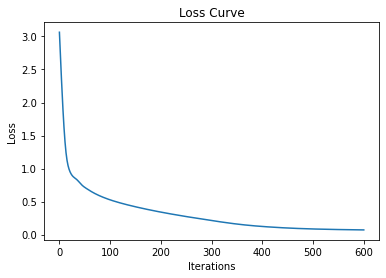

In [151]:
plt.plot(classifier.loss_curve_)
plt.title("Loss Curve")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

### Classifier Accuracy

As we can see the MEA for this net is very low, and the confusion matrixs shows only one value that was miss classified in the test data set.

In [152]:
print(mean_absolute_error(targets_test, outputs))

0.02


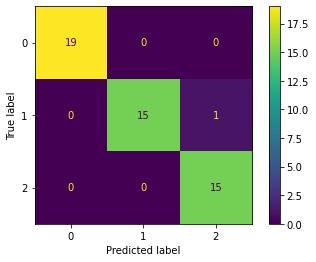

In [153]:
cm = confusion_matrix(outputs,targets_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Exercise 2 - California House Price Data

### Load the Data

In [155]:
data = fetch_california_housing()
inputs = data["data"]
targets = data["target"]

### Plot some of the raw data

Bellow is a plot of some raw data, as you can see it is quite hevily grouped towards the bottom, we want to scale this data so the differences between all these points is larger. We will use Sklearns MinMax Scaler.

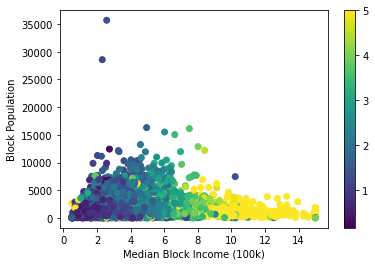

In [171]:
plt.scatter(inputs[:,0], inputs[:,4], c=targets, cmap="viridis")
plt.colorbar()
plt.xlabel('Median Block Income (100k)')
plt.ylabel('Block Population')
plt.show()

### Standard Scaler

The [MinMax Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) works by scaling the data evenly between the minimum and maximum values

One thing to keep in mind is that the min max scaler is highly effected by outliers, so the resulting scaled data can be biased.

There are two ways to combat this

- Manually remove outliers (a bad idea and probably very tedius)
- User a different method for scaling the data

In [175]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(inputs)

### The scaled data

Bellow is a graph of scaled data using the MinMax Scaler

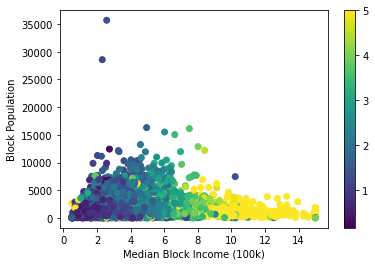

In [176]:
plt.scatter(inputs[:,0], inputs[:,4], c=targets, cmap="viridis")
plt.colorbar()
plt.xlabel('Median Block Income (100k)')
plt.ylabel('Block Population')
plt.show()

### Alternative Scaler

One alternative scaler is the [Robust Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) which scales the features in a way which is robust (hence the name) is statistical outliers. Creating less bias data to use for training.

In [178]:
scaler = RobustScaler()
scaled = scaler.fit_transform(inputs)

### Test/Train Split

In [179]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(scaled, 
                                                                          targets, 
                                                                          test_size=0.25, 
                                                                          random_state=42)

### MLP Regressor

This essentially works the same way as the classifier, execpt it outputs a contious data instead of the discred data (classes in the case of the iris data)

In [191]:
regressor = MLPRegressor()
regressor.fit(inputs_train, targets_train)
outputs = regressor.predict(inputs_test)

### Loss Curve

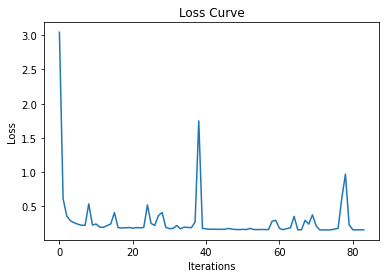

In [194]:
plt.plot(regressor.loss_curve_)
plt.title("Loss Curve")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

### Classifier Accuracy



In [193]:
print(mean_absolute_error(targets_test, outputs))

0.3929784028080793
